# Portfolio Models in HARK


In [1]:
from copy import copy
from time import time

import matplotlib.pyplot as plt
import numpy as np

from HARK.ConsumptionSaving.ConsIndShockModel import init_lifecycle
from HARK.ConsumptionSaving.ConsPortfolioModel import (
    PortfolioConsumerType,
    init_portfolio,
)
from HARK.utilities import plot_funcs

In [2]:
# Make and solve an example portfolio choice consumer type
print("Now solving an example portfolio choice problem; this might take a moment...")
MyType = PortfolioConsumerType()
MyType.cycles = 0
t0 = time()
MyType.solve()
t1 = time()
MyType.cFunc = [MyType.solution[t].cFuncAdj for t in range(MyType.T_cycle)]
MyType.ShareFunc = [MyType.solution[t].ShareFuncAdj for t in range(MyType.T_cycle)]
print(
    "Solving an infinite horizon portfolio choice problem took "
    + str(t1 - t0)
    + " seconds."
)

Now solving an example portfolio choice problem; this might take a moment...


Solving an infinite horizon portfolio choice problem took 5.1999359130859375 seconds.


Consumption function over market resources:


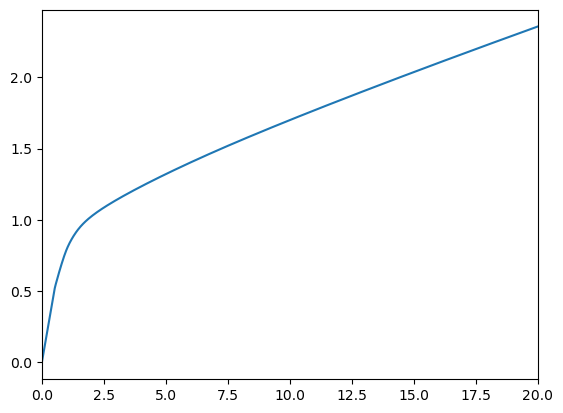

Risky asset share as a function of market resources:
Optimal (blue) versus Theoretical Limit (orange)


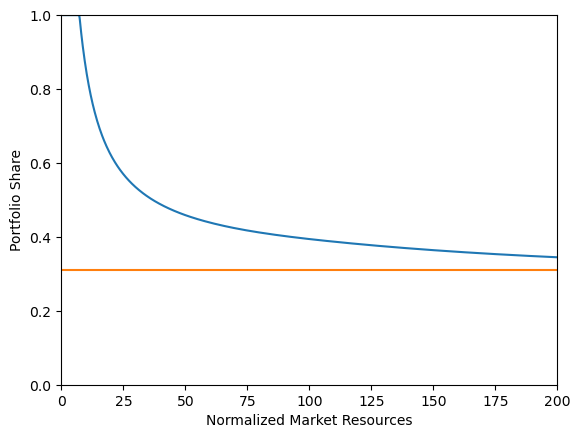

In [3]:
# Plot the consumption and risky-share functions
print("Consumption function over market resources:")
plot_funcs(MyType.cFunc[0], 0.0, 20.0)
print("Risky asset share as a function of market resources:")
print("Optimal (blue) versus Theoretical Limit (orange)")
plt.xlabel("Normalized Market Resources")
plt.ylabel("Portfolio Share")
plt.ylim(0.0, 1.0)
# Since we are using a discretization of the lognormal distribution,
# the limit is numerically computed and slightly different from
# the analytical limit obtained by Merton and Samuelson for infinite wealth
plot_funcs(
    [
        MyType.ShareFunc[0],
        lambda m: MyType.ShareLimit * np.ones_like(m),
    ],
    0.0,
    200.0,
)

In [4]:
# Now simulate this consumer type
MyType.track_vars = ["cNrm", "Share", "aNrm", "t_age"]
MyType.T_sim = 100
MyType.initialize_sim()
MyType.simulate()

{'cNrm': array([[0.90817813, 1.03234821, 0.93895877, ..., 0.97818197, 0.84936023,
         1.12020242],
        [0.94387464, 1.04618213, 0.96697859, ..., 1.03897301, 0.91091442,
         1.03919036],
        [1.03073799, 1.13701208, 1.0316563 , ..., 1.09427432, 1.00371896,
         0.99544467],
        ...,
        [1.32162527, 1.21076537, 1.01074883, ..., 1.0813753 , 1.10376194,
         1.12370596],
        [1.27953116, 1.24979895, 1.0246158 , ..., 1.07214199, 1.10681034,
         1.12995356],
        [1.34144268, 1.22379512, 1.01448791, ..., 1.09167141, 1.15069166,
         1.17400165]]),
 'Share': array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]),
 'aNrm': array([[0.45105775, 1.02451044, 0.55260976, ..., 0.71761922, 0.30438465,
         1.69655849],
        [0.57105533, 1.11746465, 0.6657

In [5]:
print("\n\n\n")
print("For derivation of the numerical limiting portfolio share")
print("as market resources approach infinity, see")
print(
    "http://www.econ2.jhu.edu/people/ccarroll/public/lecturenotes/AssetPricing/Portfolio-CRRA/"
)





For derivation of the numerical limiting portfolio share
as market resources approach infinity, see
http://www.econ2.jhu.edu/people/ccarroll/public/lecturenotes/AssetPricing/Portfolio-CRRA/


In [6]:
""
# Make another example type, but this one optimizes risky portfolio share only
# on the discrete grid of values implicitly chosen by RiskyCount, using explicit
# value maximization.
init_discrete_share = init_portfolio.copy()
init_discrete_share["DiscreteShareBool"] = True
# Have to actually construct value function for this to work
init_discrete_share["vFuncBool"] = True

In [7]:
# Make and solve a discrete portfolio choice consumer type
print("Now solving a discrete choice portfolio problem; this might take a minute...")
DiscreteType = PortfolioConsumerType(**init_discrete_share)
DiscreteType.cycles = 0
t0 = time()
DiscreteType.solve()
t1 = time()
DiscreteType.cFunc = [
    DiscreteType.solution[t].cFuncAdj for t in range(DiscreteType.T_cycle)
]
DiscreteType.ShareFunc = [
    DiscreteType.solution[t].ShareFuncAdj for t in range(DiscreteType.T_cycle)
]
print(
    "Solving an infinite horizon discrete portfolio choice problem took "
    + str(t1 - t0)
    + " seconds."
)

Now solving a discrete choice portfolio problem; this might take a minute...


Solving an infinite horizon discrete portfolio choice problem took 10.60815167427063 seconds.


Consumption function over market resources:


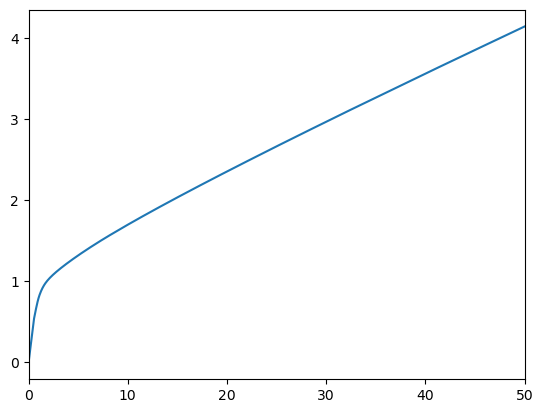

Risky asset share as a function of market resources:
Optimal (blue) versus Theoretical Limit (orange)


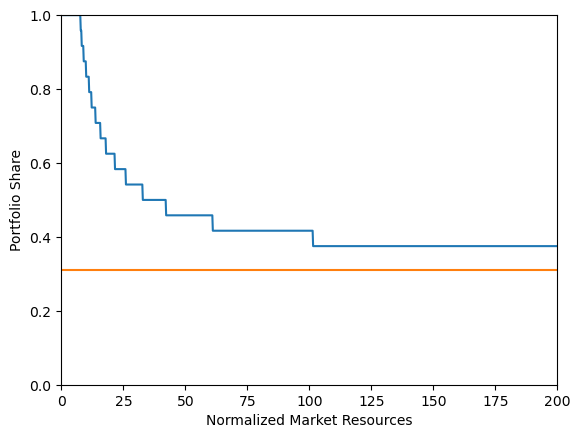

In [8]:
# Plot the consumption and risky-share functions
print("Consumption function over market resources:")
plot_funcs(DiscreteType.cFunc[0], 0.0, 50.0)
print("Risky asset share as a function of market resources:")
print("Optimal (blue) versus Theoretical Limit (orange)")
plt.xlabel("Normalized Market Resources")
plt.ylabel("Portfolio Share")
plt.ylim(0.0, 1.0)
# Since we are using a discretization of the lognormal distribution,
# the limit is numerically computed and slightly different from
# the analytical limit obtained by Merton and Samuelson for infinite wealth
plot_funcs(
    [DiscreteType.ShareFunc[0], lambda m: DiscreteType.ShareLimit * np.ones_like(m)],
    0.0,
    200.0,
)

In [9]:
print("\n\n\n")

In [10]:
""
# Make another example type, but this one can only update their risky portfolio
# share in any particular period with 15% probability.
init_sticky_share = init_portfolio.copy()
init_sticky_share["AdjustPrb"] = 0.15

In [11]:
# Make and solve a discrete portfolio choice consumer type
print(
    'Now solving a portfolio choice problem with "sticky" portfolio shares; this might take a moment...'
)
StickyType = PortfolioConsumerType(**init_sticky_share)
StickyType.cycles = 0
t0 = time()
StickyType.solve()
t1 = time()
StickyType.cFuncAdj = [
    StickyType.solution[t].cFuncAdj for t in range(StickyType.T_cycle)
]
StickyType.cFuncFxd = [
    StickyType.solution[t].cFuncFxd for t in range(StickyType.T_cycle)
]
StickyType.ShareFunc = [
    StickyType.solution[t].ShareFuncAdj for t in range(StickyType.T_cycle)
]
print(
    "Solving an infinite horizon sticky portfolio choice problem took "
    + str(t1 - t0)
    + " seconds."
)

Now solving a portfolio choice problem with "sticky" portfolio shares; this might take a moment...


Solving an infinite horizon sticky portfolio choice problem took 15.223659753799438 seconds.


Consumption function over market resources when the agent can adjust his portfolio:


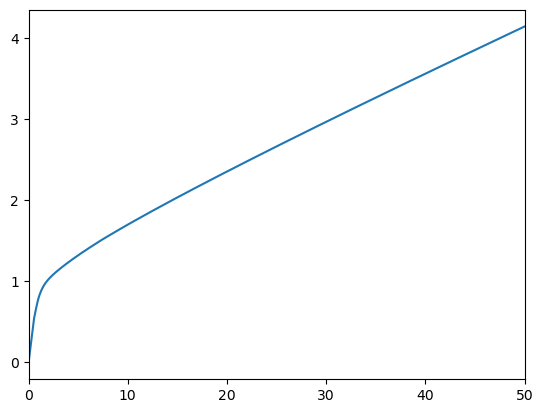

In [12]:
# Plot the consumption and risky-share functions
print(
    "Consumption function over market resources when the agent can adjust his portfolio:"
)
plot_funcs(StickyType.cFuncAdj[0], 0.0, 50.0)

Consumption function over market resources when the agent CAN'T adjust, by current share:


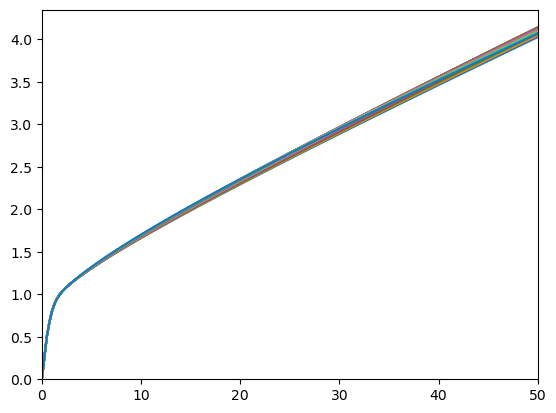

In [13]:
print(
    "Consumption function over market resources when the agent CAN'T adjust, by current share:"
)
M = np.linspace(0.0, 50.0, 200)
for s in np.linspace(0.0, 1.0, 21):
    C = StickyType.cFuncFxd[0](M, s * np.ones_like(M))
    plt.plot(M, C)
plt.xlim(0.0, 50.0)
plt.ylim(0.0, None)
plt.show()

Risky asset share function over market resources (when possible to adjust):
Optimal (blue) versus Theoretical Limit (orange)


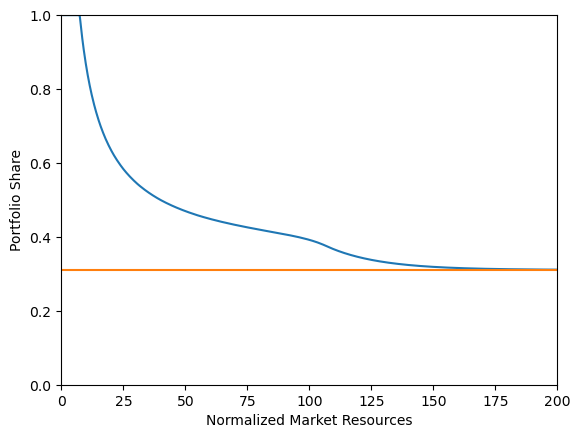

In [14]:
print("Risky asset share function over market resources (when possible to adjust):")
print("Optimal (blue) versus Theoretical Limit (orange)")
plt.xlabel("Normalized Market Resources")
plt.ylabel("Portfolio Share")
plt.ylim(0.0, 1.0)
plot_funcs(
    [StickyType.ShareFunc[0], lambda m: StickyType.ShareLimit * np.ones_like(m)],
    0.0,
    200.0,
)

Notice the wiggle in the blue line. This reflects the fact that the maximum grid point for which the solution is calculated is a=100 and the (incorrect) assumption built into the model that the portfolio share asymptotes to the frictionless analytical case. An alternative (not yet implemented) would be to calculate the implicit limit defined by the rate of geometric decay among the last grid points and assume that this is the limit.

The difference between the two is likely due to the agent's inability to adjust their portfolio.


In [15]:
""
# Make another example type, but this one has *age-varying* perceptions of risky asset returns.
# Begin by making a lifecycle dictionary, but adjusted for the portfolio choice model.
init_age_varying_risk_perceptions = copy(init_lifecycle)
init_age_varying_risk_perceptions["RiskyCount"] = init_portfolio["RiskyCount"]
init_age_varying_risk_perceptions["ShareCount"] = init_portfolio["ShareCount"]
init_age_varying_risk_perceptions["aXtraMax"] = init_portfolio["aXtraMax"]
init_age_varying_risk_perceptions["aXtraCount"] = init_portfolio["aXtraCount"]
init_age_varying_risk_perceptions["aXtraNestFac"] = init_portfolio["aXtraNestFac"]
init_age_varying_risk_perceptions["BoroCnstArt"] = init_portfolio["BoroCnstArt"]
init_age_varying_risk_perceptions["CRRA"] = init_portfolio["CRRA"]
init_age_varying_risk_perceptions["DiscFac"] = init_portfolio["DiscFac"]

In [16]:
init_age_varying_risk_perceptions["RiskyAvg"] = [1.08] * init_lifecycle["T_cycle"]
init_age_varying_risk_perceptions["RiskyStd"] = list(
    np.linspace(0.20, 0.30, init_lifecycle["T_cycle"])
)
init_age_varying_risk_perceptions["RiskyAvgTrue"] = 1.08
init_age_varying_risk_perceptions["RiskyStdTrue"] = 0.20
AgeVaryingRiskPercType = PortfolioConsumerType(**init_age_varying_risk_perceptions)
AgeVaryingRiskPercType.cycles = 1

In [17]:
# Solve the agent type with age-varying risk perceptions
# print('Now solving a portfolio choice problem with age-varying risk perceptions...')
t0 = time()
AgeVaryingRiskPercType.solve()
AgeVaryingRiskPercType.cFunc = [
    AgeVaryingRiskPercType.solution[t].cFuncAdj
    for t in range(AgeVaryingRiskPercType.T_cycle)
]
AgeVaryingRiskPercType.ShareFunc = [
    AgeVaryingRiskPercType.solution[t].ShareFuncAdj
    for t in range(AgeVaryingRiskPercType.T_cycle)
]
t1 = time()
print(
    "Solving a "
    + str(AgeVaryingRiskPercType.T_cycle)
    + " period portfolio choice problem with age-varying risk perceptions took "
    + str(t1 - t0)
    + " seconds."
)

Solving a 65 period portfolio choice problem with age-varying risk perceptions took 1.387284755706787 seconds.


Consumption function over market resources in each lifecycle period:


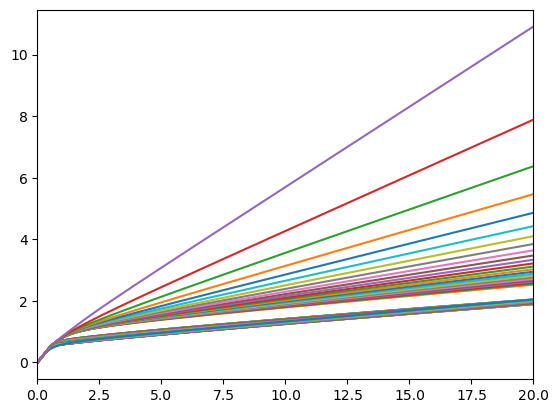

Risky asset share function over market resources in each lifecycle period:


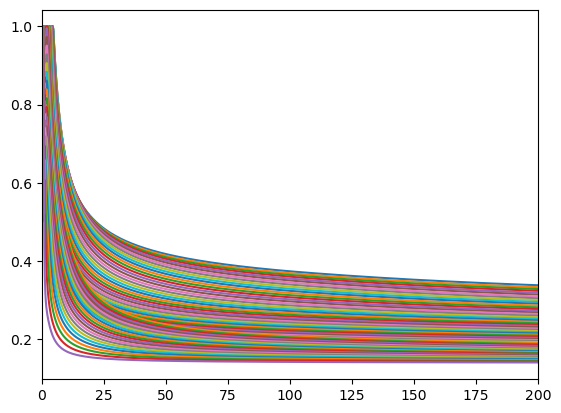

In [18]:
# Plot the consumption and risky-share functions
print("Consumption function over market resources in each lifecycle period:")
plot_funcs(AgeVaryingRiskPercType.cFunc, 0.0, 20.0)
print("Risky asset share function over market resources in each lifecycle period:")
plot_funcs(AgeVaryingRiskPercType.ShareFunc, 0.0, 200.0)

The code below tests the mathematical limits of the model.


In [19]:
# Create a grid of market resources for the plots
mMin = 0  # Minimum ratio of assets to income to plot
mMax = 5 * 1e2  # Maximum ratio of assets to income to plot
mPts = 1000  # Number of points to plot
plot_point_max = 1000
aXtraMax = plot_point_max * 10  # Maximum asset level

# range of values of assets for the plot
eevalgrid = np.linspace(0, mMax, mPts)

# Number of points that will be used to approximate the risky distribution
risky_count_grid = [5, 50, 200]
# Plot by ages (time periods) at which to plot. We will use the default life-cycle calibration.
ages = [2, 4, 6, 8]

# Create lifecycle dictionary with portfolio choice parameters
merton_dict = copy(init_lifecycle)
merton_dict["RiskyCount"] = init_portfolio["RiskyCount"]
merton_dict["ShareCount"] = init_portfolio["ShareCount"]
merton_dict["aXtraMax"] = aXtraMax
merton_dict["aXtraCount"] = init_portfolio["aXtraCount"]
merton_dict["aXtraNestFac"] = init_portfolio["aXtraNestFac"]
merton_dict["BoroCnstArt"] = init_portfolio["BoroCnstArt"]
merton_dict["CRRA"] = init_portfolio["CRRA"]
merton_dict["DiscFac"] = init_portfolio["DiscFac"]
merton_dict["RiskyAvgTrue"] = 1.08
merton_dict["RiskyStdTrue"] = 0.20


# Create a function to compute the Merton-Samuelson limiting portfolio share.
def RiskyShareMertSamLogNormal(RiskPrem, CRRA, RiskyVar):
    return RiskPrem / (CRRA * RiskyVar)

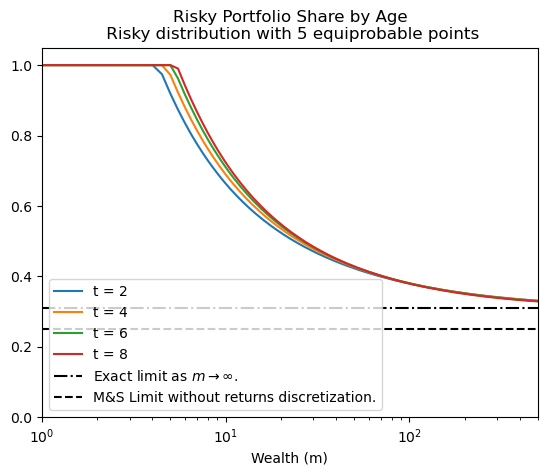

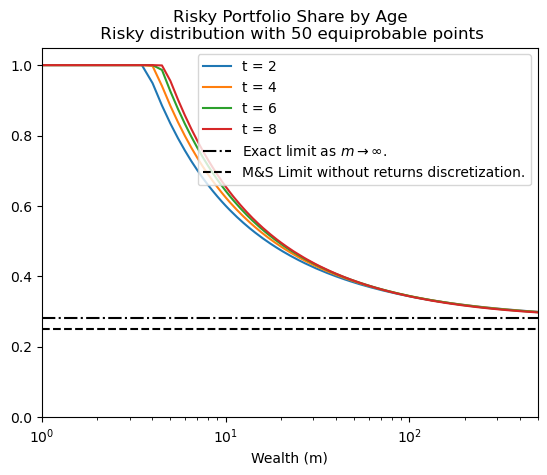

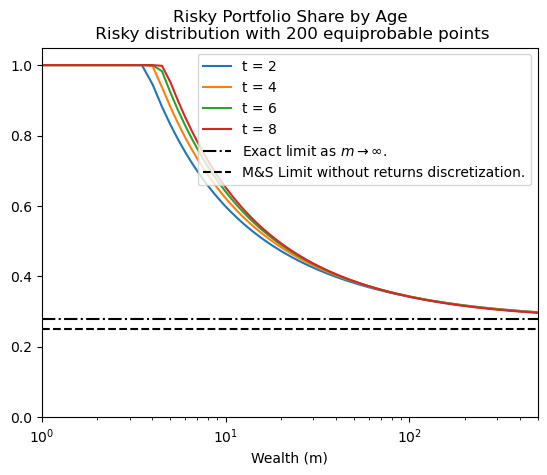

In [20]:
for rcount in risky_count_grid:

    # Create a new dictionary and replace the number of points that
    # approximate the risky return distribution

    # Create new dictionary copying the default
    merton_dict["RiskyCount"] = rcount

    # Create and solve agent
    agent = PortfolioConsumerType(**merton_dict)
    agent.solve()

    # Compute the analytical Merton-Samuelson limiting portfolio share
    RiskyVar = agent.RiskyStd**2
    RiskPrem = agent.RiskyAvg - agent.Rfree[0]
    MS_limit = RiskyShareMertSamLogNormal(RiskPrem, agent.CRRA, RiskyVar)

    # Now compute the limiting share numerically, using the approximated
    # distribution
    agent.update_ShareLimit()
    NU_limit = agent.ShareLimit

    plt.figure()
    for a in ages:
        plt.plot(
            eevalgrid, agent.solution[a].ShareFuncAdj(eevalgrid), label="t = %i" % (a)
        )

    plt.axhline(
        NU_limit, c="k", ls="-.", label="Exact limit as $m\\rightarrow \\infty$."
    )
    plt.axhline(
        MS_limit, c="k", ls="--", label="M&S Limit without returns discretization."
    )

    plt.ylim(0, 1.05)
    plt.xlim(eevalgrid[0] + 1, eevalgrid[-1])
    plt.xscale("log")
    plt.legend()
    plt.title(
        "Risky Portfolio Share by Age\n Risky distribution with {points} equiprobable points".format(
            points=rcount
        )
    )
    plt.xlabel("Wealth (m)")

    plt.ioff()
    plt.draw()